In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('ipl_clean.csv')

In [3]:
df.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Team_1_state,Team_2_state,win_city
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Hyderabad,Bangalore,Hyderabad
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Mumbai,Pune,Pune
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Gujarat,Kolkata,Kolkata


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
x = df.drop(columns=['team1','team2','id','winner','player_of_match','umpire1','umpire2','win_city'],axis=1)
y = df['win_city']

In [6]:
x.head()

,Season,city,date,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue,Team_1_state,Team_2_state
0,IPL-2017,Hyderabad,05-04-2017,Royal Challengers Bangalore,field,normal,0,35,0,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,Bangalore
1,IPL-2017,Pune,06-04-2017,Rising Pune Supergiant,field,normal,0,0,7,Maharashtra Cricket Association Stadium,Mumbai,Pune
2,IPL-2017,Rajkot,07-04-2017,Kolkata Knight Riders,field,normal,0,0,10,Saurashtra Cricket Association Stadium,Gujarat,Kolkata
3,IPL-2017,Indore,08-04-2017,Kings XI Punjab,field,normal,0,0,6,Holkar Cricket Stadium,Pune,Punjab
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,bat,normal,0,15,0,M Chinnaswamy Stadium,Bangalore,Delhi


In [7]:
y.head()

0    Hyderabad
1         Pune
2      Kolkata
3       Punjab
4    Bangalore
Name: win_city, dtype: object

In [8]:
#x_encoded = x.copy()

c=LabelEncoder()
x['Season']=c.fit_transform(x['Season'].astype(str))

In [9]:
c=LabelEncoder()
x['city']=c.fit_transform(x['city'].astype(str))

In [10]:
c=LabelEncoder()
x['toss_winner']=c.fit_transform(x['toss_winner'].astype(str))

In [11]:
c=LabelEncoder()
x['date']=c.fit_transform(x['date'].astype(str))

In [12]:
c=LabelEncoder()
x['toss_decision']=c.fit_transform(x['toss_decision'].astype(str))

In [13]:
c=LabelEncoder()
x['result']=c.fit_transform(x['result'].astype(str))

In [14]:
c=LabelEncoder()
x['dl_applied']=c.fit_transform(x['dl_applied'].astype(str))

In [15]:
c=LabelEncoder()
x['win_by_runs']=c.fit_transform(x['win_by_runs'].astype(str))

In [16]:
c=LabelEncoder()
x['venue']=c.fit_transform(x['venue'].astype(str))

In [17]:
c=LabelEncoder()
x['Team_1_state']=c.fit_transform(x['Team_1_state'].astype(str))

In [18]:
c=LabelEncoder()
x['Team_2_state']=c.fit_transform(x['Team_2_state'].astype(str))

In [19]:
x.head()

,Season,city,date,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,venue,Team_1_state,Team_2_state
0,9,14,59,13,1,1,0,38,0,28,4,0
1,9,26,75,11,1,1,0,0,7,21,7,8
2,9,28,90,7,1,1,0,0,10,31,3,6
3,9,15,109,5,1,1,0,0,6,13,8,9
4,9,2,109,13,0,1,0,16,0,17,0,2


In [20]:
c=LabelEncoder()
y=c.fit_transform(y.astype(str))

In [21]:
y[:5]

array([4, 8, 6, 9, 0])

In [22]:
x.shape,y.shape

((756, 12), (756,))

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [25]:
x_train

array([[-1.03865823,  0.76828793, -1.18283808, ..., -1.12453385,
         0.3260841 , -0.84727378],
       [-1.63077675, -1.53016678,  1.22737495, ..., -0.33331381,
        -1.46713106,  1.49752971],
       [-0.44653971, -0.92531028,  0.20987077, ...,  0.54581956,
         1.22269168,  0.32512797],
       ...,
       [-0.74259897,  0.16343143, -1.71066837, ...,  0.98538625,
         0.92382249,  1.49752971],
       [-0.15048045, -0.92531028, -0.87122743, ...,  0.54581956,
         1.22269168,  1.49752971],
       [-1.63077675,  0.76828793,  0.26074597, ..., -1.12453385,
         0.3260841 , -1.14037422]], shape=(604, 12))

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
accuracy_1=accuracy_score(y_test,y_pred)
accuracy_1

0.3026315789473684

In [30]:
precision_1=precision_score(y_test,y_pred,average='weighted',zero_division=0)
precision_1

0.27605032351549386

In [31]:
recall_1=recall_score(y_test,y_pred,average='weighted',zero_division=0)
recall_1

0.3026315789473684

In [32]:
f1_1=f1_score(y_test,y_pred,average='weighted',zero_division=0)
f1_1

0.2825522645692093

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36        12
           1       0.45      0.38      0.42        26
           2       0.08      0.10      0.09        10
           3       0.00      0.00      0.00         4
           4       0.08      0.05      0.06        19
           6       0.29      0.23      0.26        22
           7       0.31      0.42      0.36        19
           8       0.00      0.00      0.00         9
           9       0.27      0.41      0.33        17
          10       0.53      0.57      0.55        14

    accuracy                           0.30       152
   macro avg       0.23      0.27      0.24       152
weighted avg       0.28      0.30      0.28       152



C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

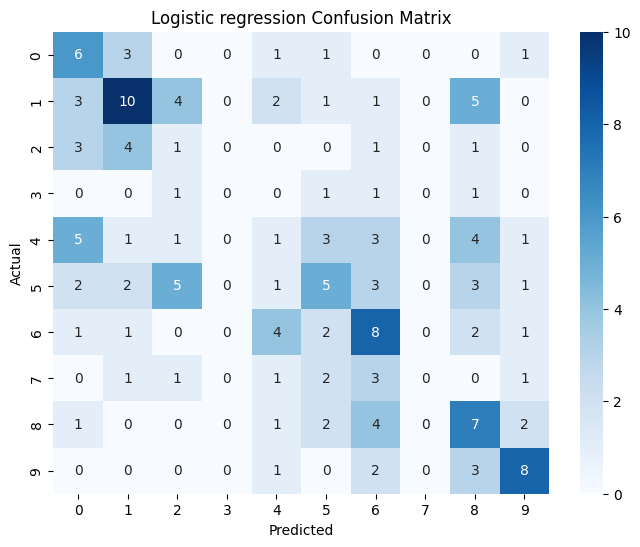

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Logistic regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                                 SUPPORT VECTOR CLASSIFIER

In [36]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [37]:
y_pred=model.predict(x_test)

In [38]:
accuracy_2=accuracy_score(y_test,y_pred)
accuracy_2

0.4144736842105263

In [39]:
precision_2=precision_score(y_test,y_pred,average='weighted',zero_division=0)
precision_2

0.40725772765246443

In [40]:
recall_2=recall_score(y_test,y_pred,average='weighted',zero_division=0)
recall_2

0.4144736842105263

In [41]:
f1_2=f1_score(y_test,y_pred,average='weighted',zero_division=0)
f1_2

0.40370222152601487

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.54      0.54      0.54        26
           2       0.19      0.40      0.26        10
           3       0.00      0.00      0.00         4
           4       0.43      0.32      0.36        19
           6       0.39      0.32      0.35        22
           7       0.27      0.42      0.33        19
           8       0.00      0.00      0.00         9
           9       0.50      0.47      0.48        17
          10       0.67      0.57      0.62        14

    accuracy                           0.41       152
   macro avg       0.35      0.37      0.35       152
weighted avg       0.41      0.41      0.40       152



C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

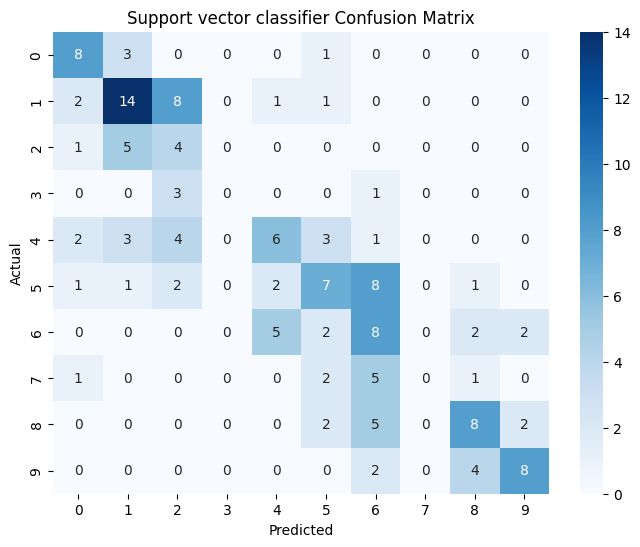

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Support vector classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                               KNeighborsClassifier  

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred=model.predict(x_test)

In [46]:
accuracy_3=accuracy_score(y_test,y_pred)
accuracy_3

0.34868421052631576

In [47]:
precision_3=precision_score(y_test,y_pred,average='weighted',zero_division=0)
precision_3

0.367753863177256

In [48]:
recall_3=recall_score(y_test,y_pred,average='weighted',zero_division=0)
recall_3

0.34868421052631576

In [49]:
f1_3=f1_score(y_test,y_pred,average='weighted',zero_division=0)
f1_3

0.34462283593477994

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40        12
           1       0.41      0.42      0.42        26
           2       0.21      0.40      0.28        10
           3       1.00      0.25      0.40         4
           4       0.33      0.21      0.26        19
           6       0.40      0.36      0.38        22
           7       0.21      0.32      0.25        19
           8       0.00      0.00      0.00         9
           9       0.50      0.41      0.45        17
          10       0.55      0.43      0.48        14

    accuracy                           0.35       152
   macro avg       0.39      0.33      0.33       152
weighted avg       0.37      0.35      0.34       152



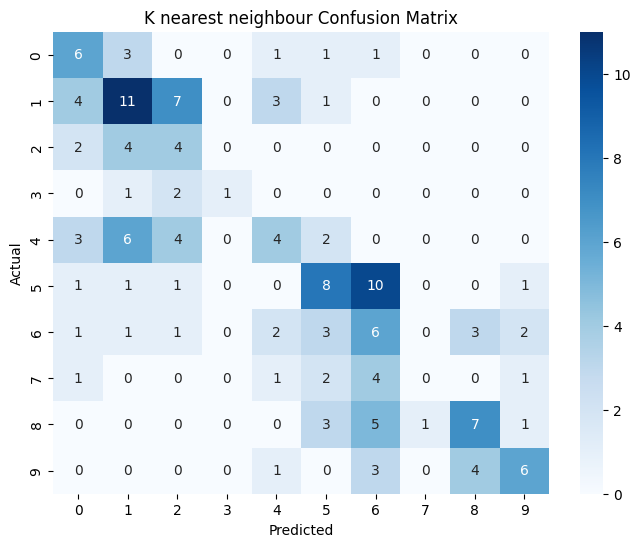

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("K nearest neighbour Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                             DecisionTreeClassifier  

In [52]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred=model.predict(x_test)

In [54]:
accuracy_4=accuracy_score(y_test,y_pred)
accuracy_4

0.8552631578947368

In [55]:
precision_4=precision_score(y_test,y_pred,average='weighted',zero_division=0)
precision_4

0.854075110784207

In [56]:
recall_4=recall_score(y_test,y_pred,average='weighted',zero_division=0)
recall_4

0.8552631578947368

In [57]:
f1_4=f1_score(y_test,y_pred,average='weighted',zero_division=0)
f1_4

0.8532400266171857

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.84      0.81      0.82        26
           2       0.78      0.70      0.74        10
           3       1.00      1.00      1.00         4
           4       0.80      0.84      0.82        19
           6       0.91      0.95      0.93        22
           7       0.94      0.89      0.92        19
           8       0.71      0.56      0.62         9
           9       0.83      0.88      0.86        17
          10       0.81      0.93      0.87        14

    accuracy                           0.86       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.85      0.86      0.85       152



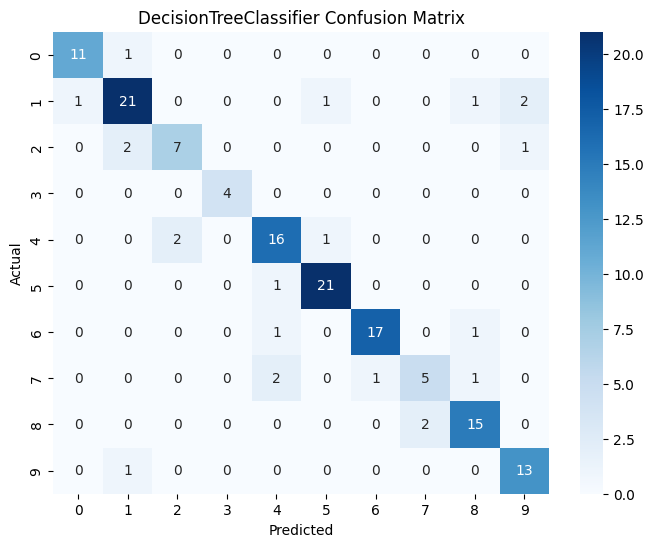

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("DecisionTreeClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                                 RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=42),
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

In [62]:
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(x_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [63]:
print("oob score of the random forest:",best_rf.oob_score_)
print(classification_report(y_test,y_pred_best))

oob score of the random forest: 0.8112582781456954
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.90      1.00      0.95        26
           2       0.78      0.70      0.74        10
           3       1.00      0.75      0.86         4
           4       0.80      0.84      0.82        19
           6       0.94      0.73      0.82        22
           7       0.65      0.79      0.71        19
           8       0.75      0.33      0.46         9
           9       0.74      0.82      0.78        17
          10       0.87      0.93      0.90        14

    accuracy                           0.82       152
   macro avg       0.83      0.78      0.79       152
weighted avg       0.82      0.82      0.81       152



In [64]:
accuracy_5=accuracy_score(y_test,y_pred_best)
accuracy_5

0.8157894736842105

In [65]:
precision_5=precision_score(y_test,y_pred_best,average='weighted',zero_division=0)
precision_5

0.8220316090972659

In [66]:
recall_5=recall_score(y_test,y_pred_best,average='weighted',zero_division=0)
recall_5

0.8157894736842105

In [67]:
f1_5=f1_score(y_test,y_pred_best,average='weighted',zero_division=0)
f1_5

0.809730640720229

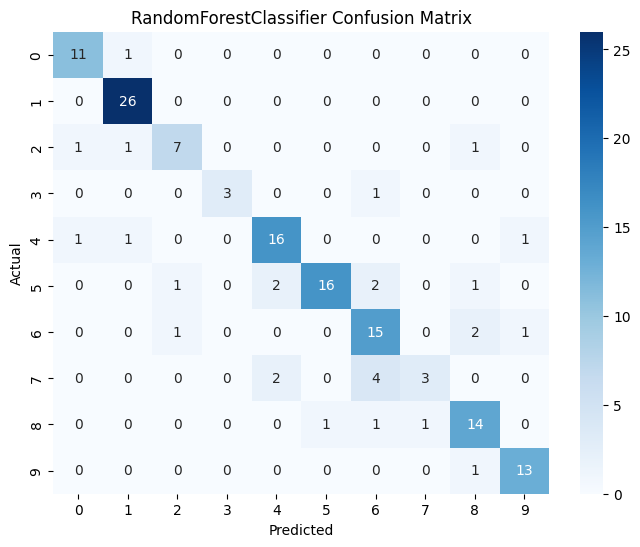

In [68]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                                                XGBOOST

In [69]:
import xgboost as xgb 

model=xgb.XGBClassifier(n_jobs=-1)

In [70]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

In [71]:
y_pred=model.predict(x_test)

In [72]:
accuracy_6=accuracy_score(y_test,y_pred)
accuracy_6

0.9802631578947368

In [73]:
precision_6=precision_score(y_test,y_pred_best,average='weighted',zero_division=0)
precision_6

0.8220316090972659

In [74]:
recall_6=recall_score(y_test,y_pred_best,average='weighted',zero_division=0)
recall_6

0.8157894736842105

In [75]:
f1_6=f1_score(y_test,y_pred_best,average='weighted',zero_division=0)
f1_6

0.809730640720229

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         4
           4       0.95      1.00      0.97        19
           6       1.00      0.95      0.98        22
           7       0.90      1.00      0.95        19
           8       1.00      0.78      0.88         9
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        14

    accuracy                           0.98       152
   macro avg       0.99      0.97      0.98       152
weighted avg       0.98      0.98      0.98       152



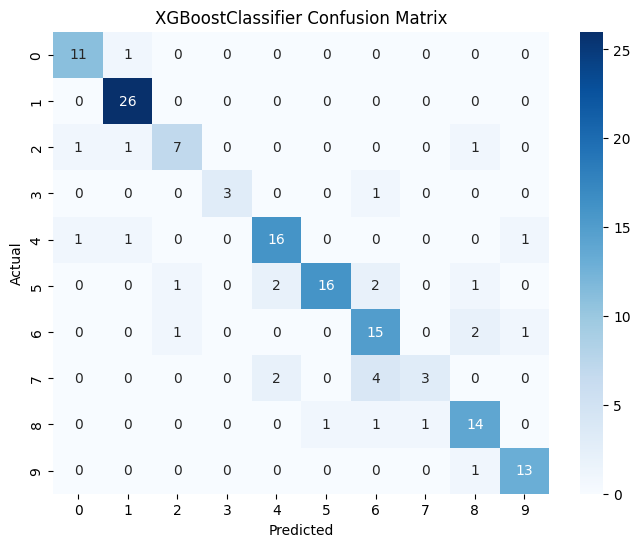

In [77]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("XGBoostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
accuracy_model=[]
precision_model=[]
recall_model=[]
f1_model=[]

In [79]:
accuracy_model.append(accuracy_1)
accuracy_model.append(accuracy_2)
accuracy_model.append(accuracy_3)
accuracy_model.append(accuracy_4)
accuracy_model.append(accuracy_5)
accuracy_model.append(accuracy_6)

In [80]:
precision_model.append(precision_1)
precision_model.append(precision_2)
precision_model.append(precision_3)
precision_model.append(precision_4)
precision_model.append(precision_5)
precision_model.append(precision_6)

In [81]:
recall_model.append(recall_1)
recall_model.append(recall_2)
recall_model.append(recall_3)
recall_model.append(recall_4)
recall_model.append(recall_5)
recall_model.append(recall_6)

In [82]:
f1_model.append(f1_1)
f1_model.append(f1_2)
f1_model.append(f1_3)
f1_model.append(f1_4)
f1_model.append(f1_5)
f1_model.append(f1_6)

In [83]:
print(accuracy_model)
print(precision_model)
print(recall_model)
print(f1_model)

[0.3026315789473684, 0.4144736842105263, 0.34868421052631576, 0.8552631578947368, 0.8157894736842105, 0.9802631578947368]
[0.27605032351549386, 0.40725772765246443, 0.367753863177256, 0.854075110784207, 0.8220316090972659, 0.8220316090972659]
[0.3026315789473684, 0.4144736842105263, 0.34868421052631576, 0.8552631578947368, 0.8157894736842105, 0.8157894736842105]
[0.2825522645692093, 0.40370222152601487, 0.34462283593477994, 0.8532400266171857, 0.809730640720229, 0.809730640720229]


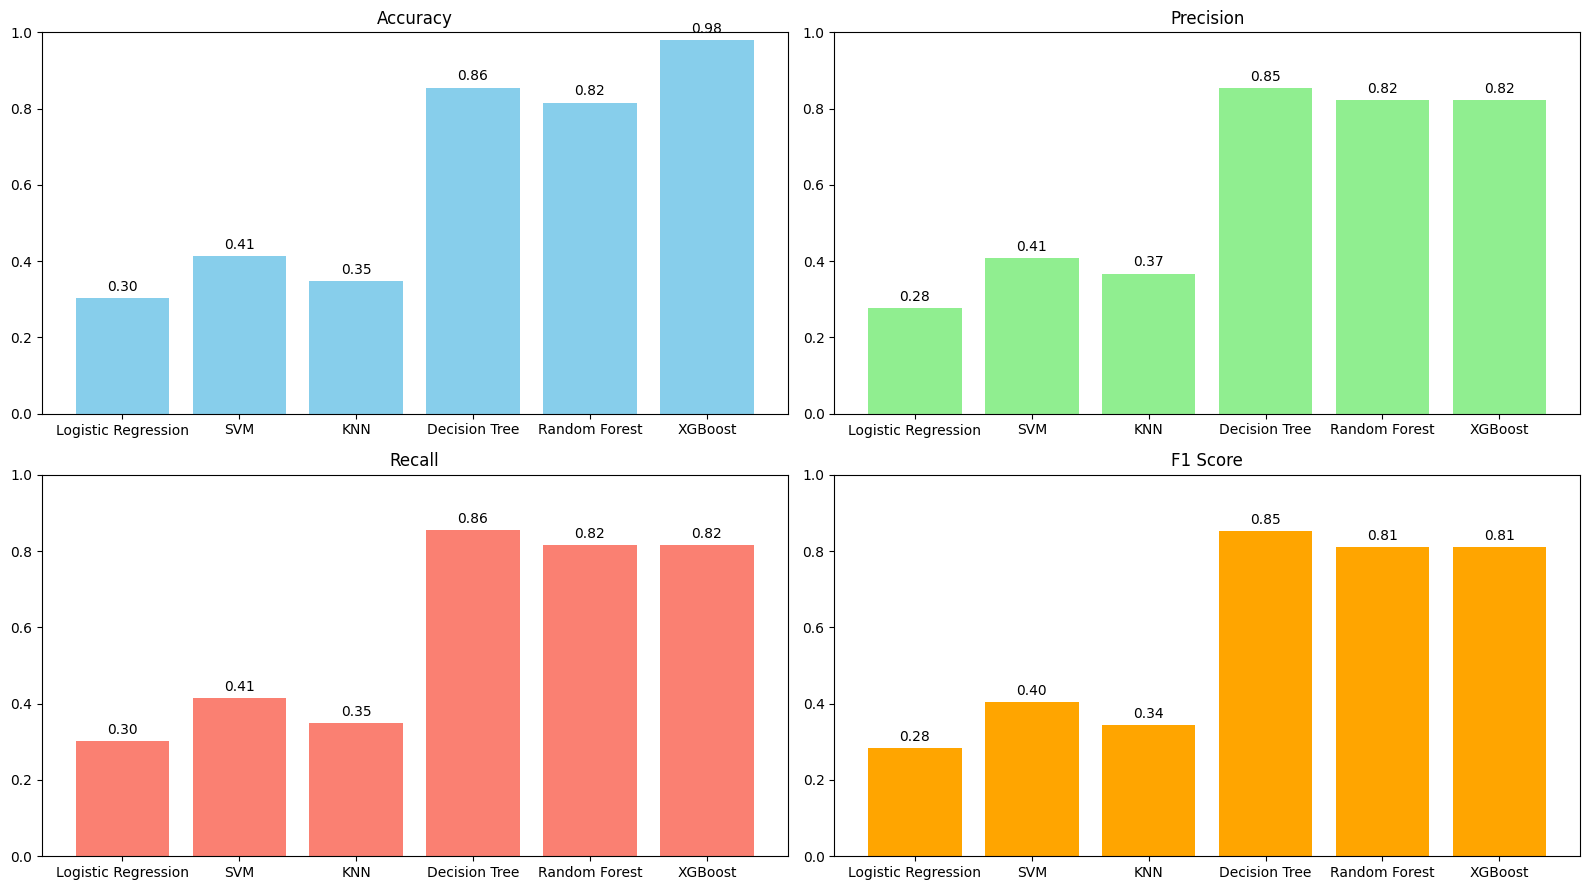

In [84]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

fig, axs = plt.subplots(2, 2, figsize=(16, 9))

bars1 = axs[0, 0].bar(models, accuracy_model, color='skyblue')
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_ylim(0, 1)
axs[0, 0].bar_label(bars1, fmt="%.2f", padding=3)

bars2 = axs[0, 1].bar(models, precision_model, color='lightgreen')
axs[0, 1].set_title("Precision")
axs[0, 1].set_ylim(0, 1)
axs[0, 1].bar_label(bars2, fmt="%.2f", padding=3)

bars3 = axs[1, 0].bar(models, recall_model, color='salmon')
axs[1, 0].set_title("Recall")
axs[1, 0].set_ylim(0, 1)
axs[1, 0].bar_label(bars3, fmt="%.2f", padding=3)

bars4 = axs[1, 1].bar(models, f1_model, color='orange')
axs[1, 1].set_title("F1 Score")
axs[1, 1].set_ylim(0, 1)
axs[1, 1].bar_label(bars4, fmt="%.2f", padding=3)

plt.tight_layout()
plt.show()


In [85]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Best model
best_xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\Saranya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Accuracy: 0.9685565571482521


In [87]:
y_pred_tuned = best_xgb_model.predict(x_test)
print("Tuned XGBoost Report:\n", classification_report(y_test, y_pred_tuned))


Tuned XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         4
           4       0.95      1.00      0.97        19
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        19
           8       1.00      0.78      0.88         9
           9       0.94      1.00      0.97        17
          10       1.00      1.00      1.00        14

    accuracy                           0.99       152
   macro avg       0.99      0.98      0.98       152
weighted avg       0.99      0.99      0.99       152



In [89]:
import joblib

In [91]:
joblib.dump(best_xgb_model, "xgboost_model.pkl")

['xgboost_model.pkl']